In [1]:
from qiskit import QuantumCircuit,Aer,execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state, array_to_latex
from math import pi

In [2]:
qc = QuantumCircuit(4)

for i in range(4):
    qc.h(i)
    qc.x(i)
    if i%2 == 0:
        qc.y(i)
        qc.i(i)
        qc.ry(pi/4,i)
        
        
    else:
        qc.x(i)
        qc.z(i)
        
    qc.h(i)
        
    
qc.cnot(0,1)

qc.draw()

┌───┐┌───┐┌───┐┌───┐┌──────────┐┌───┐     
q_0: ┤ H ├┤ X ├┤ Y ├┤ I ├┤ RY(pi/4) ├┤ H ├──■──
     ├───┤├───┤├───┤├───┤└──┬───┬───┘└───┘┌─┴─┐
q_1: ┤ H ├┤ X ├┤ X ├┤ Z ├───┤ H ├─────────┤ X ├
     ├───┤├───┤├───┤├───┤┌──┴───┴───┐┌───┐└───┘
q_2: ┤ H ├┤ X ├┤ Y ├┤ I ├┤ RY(pi/4) ├┤ H ├─────
     ├───┤├───┤├───┤├───┤└──┬───┬───┘└───┘     
q_3: ┤ H ├┤ X ├┤ X ├┤ Z ├───┤ H ├──────────────
     └───┘└───┘└───┘└───┘   └───┘

In [3]:
backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc,backend).result().get_unitary()
# Display the results:
array_to_latex(unitary, pretext="\\text{Circuit = } ")

<IPython.core.display.Math object>

In [4]:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit_textbook.tools import array_to_latex
array_to_latex(final_state, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>

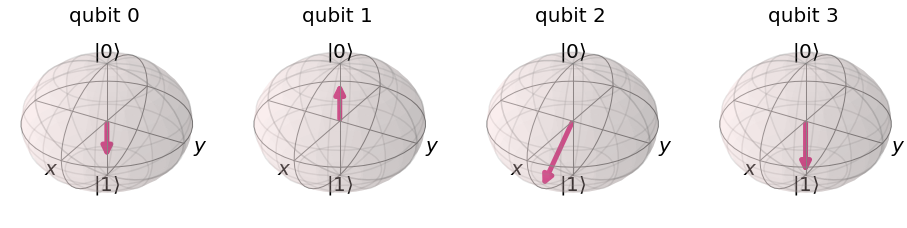

In [5]:
plot_bloch_multivector(final_state)

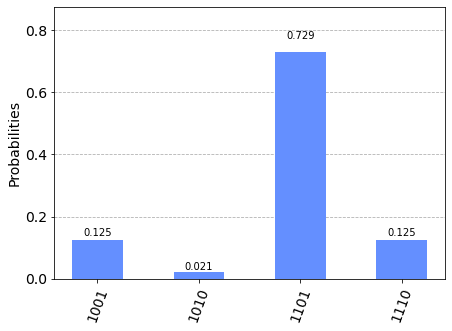

In [6]:
backend = Aer.get_backend('statevector_simulator')
final_counts = execute(qc,backend).result().get_counts()

plot_histogram(final_counts)

In [7]:
#Overriding the gates to implement our version of circuit using only rx,rz and cz gates
from Compile import Compiler
Compiler.compiler_override()

In [8]:
qc = QuantumCircuit(4)

for i in range(4):
    qc.h(i)
    qc.x(i)
    if i%2 == 0:
        qc.y(i)
        qc.i(i)
        qc.ry(pi/4,i)
        
        
    else:
        qc.x(i)
        qc.z(i)
        
    qc.h(i)
        
    
qc.cnot(0,1)

qc.draw()

┌──────────┐┌──────────┐┌──────────┐┌────────┐┌──────────┐┌────────┐»
q_0: ┤ RZ(pi/2) ├┤ RX(pi/2) ├┤ RZ(pi/2) ├┤ RX(pi) ├┤ RZ(pi/2) ├┤ RX(pi) ├»
     ├──────────┤├──────────┤├──────────┤├────────┤└┬────────┬┘├────────┤»
q_1: ┤ RZ(pi/2) ├┤ RX(pi/2) ├┤ RZ(pi/2) ├┤ RX(pi) ├─┤ RX(pi) ├─┤ RZ(pi) ├»
     ├──────────┤├──────────┤├──────────┤├────────┤┌┴────────┴┐├────────┤»
q_2: ┤ RZ(pi/2) ├┤ RX(pi/2) ├┤ RZ(pi/2) ├┤ RX(pi) ├┤ RZ(pi/2) ├┤ RX(pi) ├»
     ├──────────┤├──────────┤├──────────┤├────────┤└┬────────┬┘├────────┤»
q_3: ┤ RZ(pi/2) ├┤ RX(pi/2) ├┤ RZ(pi/2) ├┤ RX(pi) ├─┤ RX(pi) ├─┤ RZ(pi) ├»
     └──────────┘└──────────┘└──────────┘└────────┘ └────────┘ └────────┘»
«     ┌───────────┐ ┌────────┐  ┌────────┐ ┌───────────┐┌───────────┐»
«q_0: ┤ RZ(-pi/2) ├─┤ RX(pi) ├──┤ RX(pi) ├─┤ RZ(-pi/2) ├┤ RX(-pi/4) ├»
«     └┬──────────┤┌┴────────┴┐┌┴────────┴┐└┬──────────┤└┬──────────┤»
«q_1: ─┤ RZ(pi/2) ├┤ RX(pi/2) ├┤ RZ(pi/2) ├─┤ RZ(pi/2) ├─┤ RX(pi/2) ├»
«     ┌┴──────────┤└┬────────┬┘└┬────────┬┘┌┴──────────┤┌┴──────────┤»
«q_2: ┤ RZ(-pi/2) ├─┤ RX(pi) ├──┤ RX(pi) ├─┤ RZ(-pi/2) ├┤ RX(-pi/4) ├»
«     └┬──────────┤┌┴────────┴┐┌┴────────┴┐└───────────┘└───────────┘»
«q_3: ─┤ RZ(pi/2) ├┤ RX(pi/2) ├┤ RZ(pi/2) ├──────────────────────────»
«      └──────────┘└──────────┘└──────────┘                          »
«     ┌──────────┐┌──────────┐┌──────────┐┌──────────┐               »
«q_0: ┤ RZ(pi/2) ├┤ RZ(pi/2) ├┤ RX(pi/2) ├┤ RZ(pi/2) ├─■─────────────»
«     ├──────────┤└──────────┘└──────────┘└──────────┘ │ ┌──────────┐»
«q_1: ┤ RZ(pi/2) ├─────────────────────────────────────■─┤ RZ(pi/2) ├»
«     ├──────────┤┌──────────┐┌──────────┐┌──────────┐   └──────────┘»
«q_2: ┤ RZ(pi/2) ├┤ RZ(pi/2) ├┤ RX(pi/2) ├┤ RZ(pi/2) ├───────────────»
«     └──────────┘└──────────┘└──────────┘└──────────┘               »
«q_3: ───────────────────────────────────────────────────────────────»
«                                                                    »
«                             
«q_0: ────────────────────────
«     ┌──────────┐┌──────────┐
«q_1: ┤ RX(pi/2) ├┤ RZ(pi/2) ├
«     └──────────┘└──────────┘
«q_2: ────────────────────────
«                             
«q_3: ────────────────────────
«

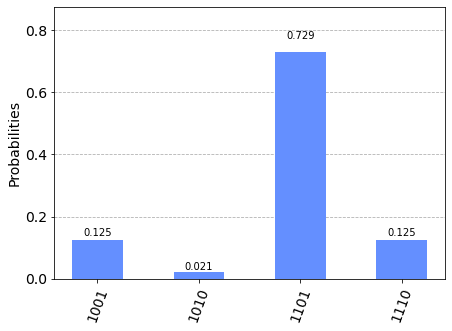

In [9]:
backend = Aer.get_backend('statevector_simulator')
final_counts = execute(qc,backend).result().get_counts()

plot_histogram(final_counts)

In [ ]:
#same result as original cirvuit